> We are interested in examining the relationship between various working conditions (*i.e.*, working hours, guaranteed paid time off, wages, and poverty rate) and happiness. The regression analysis shows that average annual hours actually worked explains about 18% of the variability in happiness score. Specifically, we see that those who are in the *low average annual hours actually worked* group are the much happier than those who are in the *high* and *medium* group.

> In terms of wage, we looked at the *Low Income*, *Lower-Middle Income*, *Upper-Middle Income*, and *High Income* countries and compared the happiness score among countries in these four income groups. The Student's *t-test* shows that those who are in the *Low Income* group are significantly less happy than those in the other three groups. Those who are in the *Lower-Middle Income* also reported lower happiness scores compared to the *Upper-Middle Income* and *High Income* group. Those who are in the *High Income* countries also reported higher happiness scores than that of those working in the *Upper-Middle Income* countries.

> The regression analysis shows that there is a significant negative relationship between poverty rate and happiness. In other words, as poverty rate decreases people tend to be happier. We also looked at the null hypothesis of whether two or more poverty groups have the same population mean by running the one-way anova test. The result of the anova test rejects the null hypothesis. Further, we performed a post-hoc test to examine the group differences. Results show that those in the *lowest poverty rate group* are significantly happier than those who are in the *middle* and *highest poverty rate group*.

> Last but not least, we examined the relationship between guaranteed annual paid time off (*i.e.,* annual paid leave, sum of paternity and maternity leave) and happiness. It is interesting to note that the United States is the only developed country with **NO** guaranteed annual paid leave, paid paternity, or maternity leave. The regression test shows that guaranteed annual paid leave does **not** predict a person's self-reported happiness score. As such, the Student's *t-test* shows that those who have less guaranteed annual paid leave are just as happy as those with more guaranteed annual paid leave. **It may not be surprising that we are unable to identify any significant relationship because employees may still be given a reasonable number of paid vacation days regardless of whether there is a nationwide guaranteed leave policy or not.**

> In examining the last variable of interest, *sum of paternity and maternity leave days (parental leave)*, we found a significant relationship, where parental leave explains a small amount of the variability in happiness scores. A one-way anova test was also conducted to test whether one or more groups (*i.e.,* low, middle, high number of parental leave days group) have the same population mean. The null hypothesis was rejected. Those with the most parental leave days reported significantly higher happiness scores than those with the least parental leave days.

> In conclusion, not all of our findings are significant. It is definitely worth dedicating more time into looking at how work policy changes over time would relate to self-reported happiness scores. Additionally, we would also like to acknowledge that the dataset used in the analysis may not have been the cleanest or most accurate. For example, the guaranteed annual paid time off information may have been gathered in different year. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import gmaps
import gmaps.geojson_geometries
from config import g_key
from decimal import Decimal
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import geopandas as gpd

## Examining the relationship between average annual hours actually worked and happiness (Enrique)

In [3]:
# read in the data
employment_data = pd.read_csv("Resources/Average annual hours actually worked.csv")
happiness_data = pd.read_csv("Resources/World Happiness Report 2018.csv")

In [4]:
# clean up employment_data

# get only relevant rows
employment_data = employment_data[["Country", "Employment status", "Time", "Value"]]

# get only total employment
total_employment = employment_data.loc[employment_data["Employment status"] == "Total employment"]

# get only 2018 data
total_employment_2018 = total_employment.loc[total_employment["Time"] == 2018]

# sort by country
total_employment_2018 = total_employment_2018.sort_values(by="Country")

# rename columns and get a final dataframe
total_employment_2018 = total_employment_2018[["Country", "Value"]]
total_employment_2018 = total_employment_2018.rename(columns={"Value": "Avg Hours Worked per Worker"})

In [5]:
# clean up happiness_data

# rename country column for merging
happiness_data = happiness_data.rename(
    columns={
        "Country or region": "Country",
        "Score": "Happiness Score"
    }
)

In [6]:
# merge happiness data into the employment data
data = pd.merge(total_employment_2018, happiness_data, how="left", on="Country")

# clean up merged data
data = data.dropna()

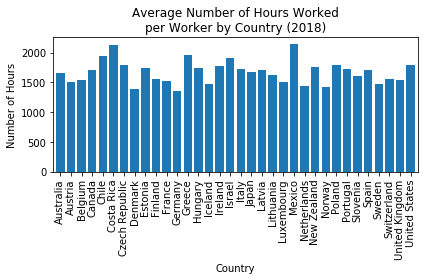

In [7]:
# Plot Average Number of Hours Worked per Worker by Country

# countries list and tick locations
countries = data["Country"].tolist()
tick_locations = np.arange(len(countries))

# dataframe for plot
hours_worked = data[["Country", "Avg Hours Worked per Worker"]]

# plot the data
hours_worked.plot(kind="bar", legend=False, width=.8)

# assign xticks
plt.xticks(tick_locations, countries, rotation=90)

# title and labels
plt.title(f"Average Number of Hours Worked\n"
          f"per Worker by Country (2018)")
plt.xlabel("Country")
plt.ylabel("Number of Hours")

# display plot
plt.tight_layout()
plt.show()

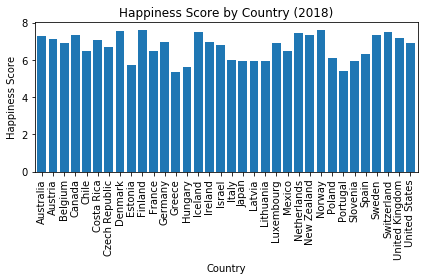

In [9]:
# Plot Happiness Score by Country

# countries list and tick locations
countries = data["Country"].tolist()
tick_locations = np.arange(len(countries))

# dataframe for plot
happiness_scores = data[["Country", "Happiness Score"]]

# plot the data
happiness_scores.plot(kind="bar", legend=False, width=.8)

# assign xticks
plt.xticks(tick_locations, countries, rotation=90)

# title and labels
plt.title("Happiness Score by Country (2018)")
plt.xlabel("Country")
plt.ylabel("Happiness Score")

# display plot
plt.tight_layout()
plt.show()

In [ ]:
# Regression Analysis for Question #1
# Hypothesis: Countries with lower working hours will tend to have a higher happiness score.

# define independent and dependent variables
independent_variable = "Avg Hours Worked per Worker"
dependent_variable = "Happiness Score"

# define title and labels
xlabel = "Number of Hours Worked"
ylabel = "Happiness Score"
title = f"{ylabel} vs. {xlabel}"

# create dataframe
hours_and_happiness = data[["Country", independent_variable, dependent_variable]]

# define x and y values
x_values = hours_and_happiness[independent_variable]
y_values = hours_and_happiness[dependent_variable]

# run regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression values
regress_values = x_values * slope + intercept

# create line equation
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 2)}"

# plot the data
plt.scatter(x_values, y_values)

# plot the regression line
plt.plot(x_values, regress_values, "r-")

# add equation
plt.annotate(line_eq, (1780, 5.8), fontsize=15, color="red")

# add title and labels to plot
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# print summary data
print(f"The r-squared value is: {round(rvalue**2, 2)}\n"
      f"The p-value is: {round(pvalue,2)}")

# display the plot
plt.show()

In [ ]:
# create categories for statistical analysis
labels = ["Low", "Medium", "High"]
hours_and_happiness["Working Hours Group"] = pd.qcut(hours_and_happiness["Avg Hours Worked per Worker"], q=3, labels=labels)

In [ ]:
# create data frame with working hours group data
working_hours_groups = hours_and_happiness.groupby("Working Hours Group").mean()

# display data frame
working_hours_groups

In [ ]:
# create a bar plot with average happiness across working hours groups
index_reset = working_hours_groups.reset_index()
x_axis = index_reset["Working Hours Group"]
y_axis = working_hours_groups["Happiness Score"]
plt.bar(x_axis, y_axis)

plt.title("Happiness Score by Working Hours Group")
plt.xlabel("Working Hours Group")
plt.ylabel("Mean Happiness Score")

plt.tight_layout()
plt.show()

In [ ]:
# get happiness scores for each category
low_hours_happiness = hours_and_happiness.loc[hours_and_happiness["Working Hours Group"] == "Low", "Happiness Score"]
med_hours_happiness = hours_and_happiness.loc[hours_and_happiness["Working Hours Group"] == "Medium", "Happiness Score"]
high_hours_happiness = hours_and_happiness.loc[hours_and_happiness["Working Hours Group"] == "High", "Happiness Score"]

# get the statistic value for each test
low_vs_med_statistic = stats.ttest_ind(low_hours_happiness, med_hours_happiness).statistic
low_vs_high_statistic = stats.ttest_ind(low_hours_happiness, high_hours_happiness).statistic
med_vs_high_statistic = stats.ttest_ind(med_hours_happiness, high_hours_happiness).statistic

# get the pvalue for each test
low_vs_med_pvalue = stats.ttest_ind(low_hours_happiness, med_hours_happiness).pvalue
low_vs_high_pvalue = stats.ttest_ind(low_hours_happiness, high_hours_happiness).pvalue
med_vs_high_pvalue = stats.ttest_ind(med_hours_happiness, high_hours_happiness).pvalue

# initial print statement
print("=============================================================================================\n"
      "Statistical Analysis:\n\n"
      "\tIndependent Student's t-test for Happiness vs. Average Hours Worked per Worker.\n\n"
      "Null Hypothesis:\n\n"
      "\tIf number of hours worked has no impact on happiness score, then the mean happiness\n"
      "score accross all three groups will be the same.\n"
      "=============================================================================================\n")

# test 1 print statements
print("---------------------------------------------------------------------------------------------\n"
      "Test 1: Lowest Working Hours Group vs Medium Working Hours Group\n\n"
      f"\tStatistic = {low_vs_med_statistic}\n"
      f"\tP-value = {low_vs_med_pvalue}\n")
if low_vs_med_pvalue < 0.05:
    print(f"Since our pvalue of {round(low_vs_med_pvalue,4)} is lower than 0.05, we choose to reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(low_vs_med_pvalue,4)} is greater than 0.05, we choose not to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------------")

# test 2 print statements
print("Test 2: Lowest Working Hours Group vs Highest Working Hours Group\n\n"
      f"\tStatistic = {low_vs_high_statistic}\n"
      f"\tP-value = {low_vs_high_pvalue}\n")
if low_vs_high_pvalue < 0.05:
    print(f"Since our pvalue of {round(low_vs_high_pvalue,4)} is lower than 0.05, we choose to reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(low_vs_high_pvalue,4)} is greater than 0.05, we choose not to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------------")

# test 3 print statements
print("Test 3: Medium Working Hours Group vs Highest Working Hours Group\n\n"
      f"\tStatistic = {med_vs_high_statistic}\n"
      f"\tP-value = {med_vs_high_pvalue}\n")
if med_vs_high_pvalue < 0.05:
    print(f"Since our pvalue of {round(med_vs_high_pvalue,4)} is lower than 0.05, we choose to reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(med_vs_high_pvalue,4)} is greater than 0.05, we choose not to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------------\n")

print("=============================================================================================\n"
      "Conclusion\n\n"
      "\tIn our first test, we chose to reject the null hypothesis. We cannot say that the\n"
      "difference in working hours between the lowest working hours group and the medium working\n"
      "hours group has no effect on happiness score.\n\n"
      "\tOur second test demonstrates the same result. We cannot say that the difference in\n"
      "working hours between the lowest working hours group and the highest working hours group\n"
      "has no effect on happiness score.\n\n"
     "\tThe third test gave us different results. We chose to not reject the null hypothesis.\n"
      "The difference in working hours between the medium working hours group and the highest\n"
      "working hours group has no statistically significant effect on happiness score.\n"
     "=============================================================================================")

## Examining the relationship between wages and happiness (Jake)

In [ ]:
#read in ILO data

ilo_data = pd.read_csv("Resources/ILOSTAT.csv")

#merge data frames
#You need to run Enrique's code before this cell to create happiness_data and rename the country column
ilo_happiness_df = pd.merge(ilo_data, happiness_data, on="Country")

ilo_happiness_df.head()

In [ ]:
#separate countries into income groups
low_income = ilo_happiness_df[ilo_happiness_df["Group"] == "Low income countries"]
low_mid_income = ilo_happiness_df[ilo_happiness_df["Group"] == "Lower-middle income countries"]
up_mid_income = ilo_happiness_df[ilo_happiness_df["Group"] == "Upper-middle income countries"]
high_income = ilo_happiness_df[ilo_happiness_df["Group"] == "High income countries"]

low_income_happiness = low_income["Happiness Score"]
low_mid_income_happiness = low_mid_income["Happiness Score"]
up_mid_income_happiness = up_mid_income["Happiness Score"]
high_income_happiness = high_income["Happiness Score"]

#calculate mean happiness score for each income group
low_income_mean = low_income_happiness.mean()
low_mid_income_mean = low_mid_income_happiness.mean()
up_mid_income_mean = up_mid_income_happiness.mean()
high_income_mean= high_income_happiness.mean()


#create dataframe with income groups and their mean happiness score
happiness_groups = pd.DataFrame({"Income Group": ["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"],
                                "Average Happiness Score": [low_income_mean, low_mid_income_mean, up_mid_income_mean, high_income_mean]})

happiness_groups

In [ ]:
#determine size of each group
print(f"Group n-size:\n"
      f"-----------------\n"
      f"Low Income: {len(low_income_happiness)}\n"
      f"Lower-Middle Income: {len(low_mid_income_happiness)}\n"
      f"Upper-Middle Income: {len(up_mid_income_happiness)}\n"
      f"High Income: {len(high_income_happiness)}")

In [ ]:
plt.bar(happiness_groups["Income Group"], happiness_groups["Average Happiness Score"], color='r', alpha=1, align="center")
plt.xticks(rotation=45)
plt.title(f"Average Happiness Score by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Average Happiness Score")
plt.show()

In [ ]:
#statistical testing

# get the statistic value for each test
low_vs_lowMid_statistic = stats.ttest_ind(low_income_happiness, low_mid_income_happiness).statistic
low_vs_upMid_statistic = stats.ttest_ind(low_income_happiness, up_mid_income_happiness).statistic
low_vs_high_statistic = stats.ttest_ind(low_income_happiness, high_income_happiness).statistic
lowMid_vs_upMid_statistic = stats.ttest_ind(low_mid_income_happiness, up_mid_income_happiness).statistic
lowMid_vs_high_statistic = stats.ttest_ind(low_mid_income_happiness, high_income_happiness).statistic
upMid_vs_high_statistic = stats.ttest_ind(up_mid_income_happiness, high_income_happiness).statistic

# get the pvalue for each test
low_vs_lowMid_pvalue = stats.ttest_ind(low_income_happiness, low_mid_income_happiness).pvalue
low_vs_upMid_pvalue = stats.ttest_ind(low_income_happiness, up_mid_income_happiness).pvalue
low_vs_high_pvalue = stats.ttest_ind(low_income_happiness, high_income_happiness).pvalue
lowMid_vs_upMid_pvalue = stats.ttest_ind(low_mid_income_happiness, up_mid_income_happiness).pvalue
lowMid_vs_high_pvalue = stats.ttest_ind(low_mid_income_happiness, high_income_happiness).pvalue
upMid_vs_high_pvalue = stats.ttest_ind(up_mid_income_happiness, high_income_happiness).pvalue

# initial print statement
print("=======================================================================================\n"
      "Statistical Analysis:\n\n"
      "\tIndependent Student's t-test for Average Happiness Score by ILO Income Group.\n\n"
      "Null Hypothesis:\n\n"
      "\tIf income group has no impact on happiness score, then the mean happiness\n"
      "score accross all four groups will be the same.\n"
      "=======================================================================================\n")

# test 1 print statements
print("---------------------------------------------------------------------------------------\n"
      "Test 1: Low Income Group vs Lower-Middle Income Group\n\n"
      f"\tStatistic = {low_vs_lowMid_statistic}\n"
      f"\tP-value = {low_vs_lowMid_pvalue}\n")
if low_vs_lowMid_pvalue < 0.05:
    print(f"Since our pvalue of {round(low_vs_lowMid_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(low_vs_lowMid_pvalue,4)} is greater than 0.05, we fail to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------")

# test 2 print statements
print("Test 2: Low Income Group vs Upper-Middle Income Group\n\n"
      f"\tStatistic = {low_vs_upMid_statistic}\n"
      f"\tP-value = {low_vs_upMid_pvalue}\n")
if low_vs_upMid_pvalue < 0.05:
    print(f"Since our pvalue of {round(low_vs_upMid_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(low_vs_upMid_pvalue,4)} is greater than 0.05, we fail to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------")

# test 3 print statements
print("Test 3: Low Income Group vs High Income Group\n\n"
      f"\tStatistic = {low_vs_high_statistic}\n"
      f"\tP-value = {low_vs_high_pvalue}\n")
if low_vs_high_pvalue < 0.05:
    print(f"Since our pvalue of {round(low_vs_high_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(low_vs_high_pvalue,4)} is greater than 0.05, we fail to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------\n")

# test 4 print statements
print("---------------------------------------------------------------------------------------\n"
      "Test 1: Lower-Middle Income Group vs Upper-Middle Income Group\n\n"
      f"\tStatistic = {lowMid_vs_upMid_statistic}\n"
      f"\tP-value = {lowMid_vs_upMid_pvalue}\n")
if lowMid_vs_upMid_pvalue < 0.05:
    print(f"Since our pvalue of {round(lowMid_vs_upMid_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(lowMid_vs_upMid_pvalue,4)} is greater than 0.05, we fail to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------")

# test 5 print statements
print("Test 2: Lower-Middle Income Group vs High Income Group\n\n"
      f"\tStatistic = {lowMid_vs_high_statistic}\n"
      f"\tP-value = {lowMid_vs_high_pvalue}\n")
if lowMid_vs_high_pvalue < 0.05:
    print(f"Since our pvalue of {round(lowMid_vs_high_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(lowMid_vs_high_pvalue,4)} is greater than 0.05, we fail to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------")

# test 6 print statements
print("Test 3: Upper-Middle Income Group vs High Income Group\n\n"
      f"\tStatistic = {upMid_vs_high_statistic}\n"
      f"\tP-value = {upMid_vs_high_pvalue}\n")
if upMid_vs_high_pvalue < 0.05:
    print(f"Since our pvalue of {round(upMid_vs_high_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(upMid_vs_high_pvalue,4)} is greater than 0.05, we fail to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------\n")

print("In all tests, we reject the null hypothesis. Mean happiness score is not the same between income groups.")

## Examining the relationship between poverty rate and happiness (Jake)

In [ ]:
#happiness score vs poverty rate

poverty_df = pd.DataFrame({"Country": ilo_happiness_df["Country"],
                          "Happiness Score": ilo_happiness_df["Happiness Score"]})

for row in poverty_df:
    poverty_df["Poverty Rate"] = ilo_happiness_df["Extremely poor"] + ilo_happiness_df["Moderately poor"]
    
poverty_df = poverty_df.dropna()

poverty_df

In [ ]:
# define x and y values
x_values = poverty_df["Poverty Rate"]
y_values = poverty_df["Happiness Score"]

# run regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression values
regress_values = x_values * slope + intercept

# create line equation
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 2)}"

# plot the data
plt.scatter(x_values, y_values)

# plot the regression line
plt.plot(x_values, regress_values, "r-")

# add equation
plt.annotate(line_eq, (39, 5.5), fontsize=15, color="red")

# add title and labels to plot
plt.title("Happiness Score vs. Poverty Rate")
plt.xlabel("Poverty Rate")
plt.ylabel("Happiness Score")

# print summary data
print(f"The r-squared value is: {round(rvalue**2, 2)}")
print(f"The p-value is: {round(pvalue, 2)}")

# display the plot
plt.show()

In [ ]:
# Categorizing poverty into terciles (3 groups)
poverty_grps = ['Lowest', 'Middle', 'Highest']
poverty_df['poverty_groups'] = pd.qcut(poverty_df["Poverty Rate"],
                              q=[0, 1/3, 2/3, 1],
                              labels=poverty_grps)

# computing the mean happiness score by annual leave groups
poverty_data = poverty_df.groupby('poverty_groups')
poverty_data = poverty_data.mean()
poverty_data

In [ ]:
# running anova test
lowest_poverty = poverty_df[poverty_df["poverty_groups"] == 'Lowest']["Happiness Score"]
middle_poverty = poverty_df[poverty_df["poverty_groups"] == 'Middle']["Happiness Score"]
highest_poverty = poverty_df[poverty_df["poverty_groups"] == 'Highest']["Happiness Score"]

# Create a boxplot to compare means
poverty_df.boxplot("Happiness Score", by="poverty_groups", figsize=(20, 10));

In [ ]:
# run statistical testing (anova)
stats.f_oneway(lowest_poverty, middle_poverty, highest_poverty)

# running  a post-hoc test (Tukey) to investigate if there any significant difference between populations mean score
MultiComp = MultiComparison(poverty_df['Happiness Score'],
                            poverty_df['poverty_groups'])
print(MultiComp.tukeyhsd().summary())


### Findings:

> The regression analysis shows a significant negative relationship between poverty rate and happiness.

> The null hypothesis states that there are no differences in happiness scores among those living in countries with low, middle, and high poverty rate. The anova test successfully reject the null hypothesis (*i.e.,* two or more groups have the same population mean). 
> - All three comparisons have a *p-value* of less than .05. Therefore, the null hypothesis is rejected. 
>> - Those living in the lowest poverty rate countries are happier than those living in both middle and high poverty rate countries.
>> - Those living in the middle poverty rate countries, in turn, are happier than those living in the high poverty rate countries.

## Examining the relationship between guaranteed annual paid leave and happiness (Yee Mun)

In [ ]:
# reading the world happiness data
happy_data = pd.read_csv('./Resources/World Happiness Report 2018.csv')

# keep only the Overall Rank and Score columns in the dataframe
happy_data = happy_data[['Country or region','Score']]

# check the dataframe
happy_data.head()

In [ ]:
# read the annual leave dataset
annual_leave = pd.read_csv('./Resources/Annual Paid Leave.csv')

# check the dataset
annual_leave.head()

In [ ]:
# merge both dataframes
combined_leave = pd.merge(annual_leave,happy_data, right_on = 'Country or region', left_on = 'Country')
combined_leave = combined_leave.rename(columns={"Total Days": "Guaranteed Annual Paid Leave"})
combined_leave = combined_leave.drop('Country or region',axis=1)

combined_leave['Guaranteed Annual Paid Leave'] = combined_leave['Guaranteed Annual Paid Leave'].astype(float)

# check combined dataset
combined_leave.head()

In [ ]:
# set the filepath and load in a shapefile
#fp = "./Resources/Countries_WGS84/Countries_WGS84.shp"
fp = "./Resources/TM_WORLD_BORDERS/TM_WORLD_BORDERS_SIMPL-0.3.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df = map_df.rename(columns={"NAME": "Country"})
map_df.head()

In [ ]:
# join the geodataframe with the cleaned up csv dataframe
combined_leave = map_df.set_index('Country').join(combined_leave.set_index('Country'))
combined_leave = combined_leave.dropna()
combined_leave = combined_leave.reset_index()
combined_leave = combined_leave.sort_values('Guaranteed Annual Paid Leave')

### Option 1 for showing the Guaranteed Annual Paid Leave Heatmap by Country. Clicking on the intensity displays the number of paid leave days

In [ ]:
gmaps.configure(api_key=g_key)

locations = combined_leave[["LAT", "LON"]].astype(float)

paid_leave = combined_leave['Guaranteed Annual Paid Leave']
max_paid_leave = max(paid_leave)

# Plot Heatmap
fig = gmaps.figure(center=(45, -99),zoom_level=2.3)

# Create layer
vacation_layer = gmaps.heatmap_layer(locations, weights=paid_leave, 
                                 dissipating=False, max_intensity=max_paid_leave, point_radius=2)

# Add layer
fig.add_layer(vacation_layer)

# Create layer with labels
text_layer = gmaps.symbol_layer(locations, fill_color=None, fill_opacity=0, stroke_color=None, 
                                stroke_opacity=0, scale=1, 
                                info_box_content = [f"Guaranteed Annual Paid Leave: {leave} day(s)" for leave in paid_leave])

# Add labels layer
fig.add_layer(text_layer)
fig

### Option 2 for showing the Guaranteed Annual Paid Leave Heatmap by Country. This option shows better intensity differentiation, but do not show the number of paid leave days

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
paid_leave = combined_leave['Guaranteed Annual Paid Leave']

# set the range for the choropleth
vmin, vmax = 0, max(paid_leave)

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 6))

# create map
heatmap = combined_leave.plot(column=paid_leave, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis and set axis limits
ax.axis('off')
ax.set_ylim([-60, 100])
ax.set_xlim([-200, 200])

# add a title
ax.set_title('Guaranteed Annual Paid Leave across the World', fontdict={'fontsize': '12', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [ ]:
# show the guaranteed annual paid leave by country
country = combined_leave['Country']
x_axis = np.arange(len(country))
tick_locations = [value+.3 for value in x_axis]

plt.figure(figsize=(15,5))
plt.bar(x_axis, combined_leave['Guaranteed Annual Paid Leave'], color='r', alpha=.5, align = 'edge')
plt.xticks(tick_locations, combined_leave["Country"], rotation=90)

# Set x and y limits
plt.xlim(-1, len(x_axis)+1)
plt.ylim(0, max(combined_leave['Guaranteed Annual Paid Leave'])+10)

# Give our chart some labels and a tile
plt.title("Guaranteed Annual Paid Leave across Countries", pad = 15)
plt.xlabel("Country")
plt.ylabel("Guaranteed Annual Paid Leave", labelpad = 15)

plt.tight_layout()

In [ ]:
# running regression
x_values = combined_leave['Guaranteed Annual Paid Leave']
y_values = combined_leave['Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,((combined_leave['Guaranteed Annual Paid Leave'].min()),combined_leave['Score'].min()),
             fontsize=15,color="red")
plt.xlabel("Guaranteed Annual Paid Leave")
plt.ylabel("Happiness Score")
plt.show()

print(f"r-square = {round(rvalue**2,2)}, p-value = {round(pvalue,2)}")

In [ ]:
# Categorizing the guaranteed annual paid leave into terciles (3 groups)
annual_leave_grps = ['Least', 'Middle', 'Most']
combined_leave['annual_leave_groups'] = pd.qcut(combined_leave['Guaranteed Annual Paid Leave'],
                              q=[0, 1/3, 2/3, 1],
                              labels=annual_leave_grps)

# Check dataframe
combined_leave.head()

In [ ]:
# creating a dataframe with just annual leave groups and happiness score
vacation_data = combined_leave.loc[:,['annual_leave_groups','Score']]
vacation_data.head()

# computing the mean happiness score by annual leave groups
ax = vacation_data.groupby('annual_leave_groups')
ax = ax.mean()
ax

In [ ]:
# creating a bar chart, showing happiness score by guaranteed annual leave groups

ax = ax.reset_index().plot(x='annual_leave_groups', y='Score',kind = 'bar', rot = 0, legend = False)

# Set a title and axis label for the chart
plt.title("Happiness Score by Guaranteed Annual Leave Groups\
            \n (Countries in the 'Most' group have the most number of guaranteed annual leave days)", pad = 15)
plt.ylabel("Happiness Score", labelpad=15)
plt.xlabel("Guaranteed Annual Leave Groups", labelpad=15);

In [ ]:
least = vacation_data[vacation_data["annual_leave_groups"] == 'Least']["Score"]
middle = vacation_data[vacation_data["annual_leave_groups"] == 'Middle']["Score"]
most = vacation_data[vacation_data["annual_leave_groups"] == 'Most']["Score"]

p = stats.ttest_ind(most, least, equal_var=False).pvalue
stats.ttest_ind(most, least, equal_var=False)

### Findings:

> The Student *t-test* tests the null hypothesis that two groups have the same population mean. The null hypothesis states that there will be no difference in happiness scores between those with the least and most guaranteed annual paid leave.

> The *p-value* is more than .05 and therefore, we fail to reject the null hypothesis. In other words, those who have the least guaranteed annual paid leave are just as happy as those having the most guaranteed annual paid leave.

> Based on the results of the regression analysis, there is no significant relationship between guaranteed annual paid leave and happiness.

## Examining the relationship between parental leave and happiness score (Yee Mun)

In [ ]:
# read the paternity and maternity dataset
paternity_leave = pd.read_csv('./Resources/Paternity Leave.csv')
maternity_leave = pd.read_csv('./Resources/Maternity Leave.csv')

# check the dataset
paternity_leave.tail(10)
maternity_leave.tail(10)

In [ ]:
# merge all dataframes
combined_parental = pd.merge(happy_data,paternity_leave, left_on = 'Country or region', how='outer',right_on = 'Country')
combined_parental = combined_parental.drop('Country or region',axis=1)
combined_parental = pd.merge(combined_parental,maternity_leave, on = 'Country', how = 'outer')

# there are some missing values in the combined dataset
# remove rows with missing values
combined_parental = combined_parental.dropna()

# check dataset, sorted by total paid paternity and total paid maternity leave
combined_parental = combined_parental.sort_values(['Total Paid Paternity Leave','Total Paid Maternity Leave in Days'])
combined_parental.head(10)

In [ ]:
# looking at only the first 10 countries, sorted by total paid paternity and maternity leave
least_paternity_maternity = combined_parental.iloc[0:10,[1,2,5]]

country = least_paternity_maternity['Country'].tolist()
x_axis = np.arange(len(country))
tick_locations = [value+.03 for value in x_axis]

paternity = least_paternity_maternity['Total Paid Paternity Leave'].tolist()
maternity = least_paternity_maternity['Total Paid Maternity Leave in Days'].tolist()

plt.figure(figsize=(15,5))
p1 = plt.bar(x_axis, maternity, align='center')
p2 = plt.bar(x_axis, paternity, bottom=maternity, align='center')
plt.xticks(tick_locations, least_paternity_maternity["Country"], rotation=90)

plt.title("Guaranteed Paid Paternity and Maternity Leave across Top 10 Countries,\
        \n sorted by least paternity and maternity leave", pad = 15)
plt.ylabel('Guaranteed Paid Paternity and Maternity Leave (days)', labelpad = 15)
plt.xlabel('Country', labelpad = 15)
plt.legend((p1[0], p2[0]), ('Maternity Leave', 'Paternity Leave'))

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0,100)
plt.show()

print(f"All of the top 10 countries sorted by least paid paternity and maternity leave have NO guaranteed paternity leave.")
print(f"United States is the only country without any guaranteed paid maternity leave.")
print(f"Please note it is NOT an error that the chart doesn't show paternity leave. These countries do not have a \n"
      "guaranteed paternity leave policy.")


In [ ]:
least_paternity_maternity = combined_parental.iloc[0:10,[1,2,5]]

labels = least_paternity_maternity['Country'].tolist()
men_means = least_paternity_maternity['Total Paid Paternity Leave'].tolist()
women_means = least_paternity_maternity['Total Paid Maternity Leave in Days'].tolist()

x = np.arange(len(labels))  # the label locations
#width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Paternity')
rects2 = ax.bar(x + width/2, women_means, width, label='Maternity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Guaranteed Paid Paternity and Maternity leave (days)')
ax.set_title('Guaranteed Paid Paternity and Maternity Leave Across Top 10 Countries\n'
             'Sorted by Least Paternity and Maternity Leave"')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

#plt.xlim(-1, len(labels)+2)
plt.ylim(0, 100)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Considering that we are not able to locate happiness score by sex, we will only consider countries with both paid paternity and maternity leave in the following analysis

In [ ]:
# select only countries with paternity and maternity leave
df = combined_parental[(combined_parental['Total Paid Paternity Leave'] > 0) & 
          combined_parental['Total Paid Maternity Leave in Days'] > 0] 

# check if dataset is correctly selected
df.sort_values(['Total Paid Paternity Leave','Total Paid Maternity Leave in Days'])

In [ ]:
# running regression
df['Total Paternity and Maternity Leave'] = df['Total Paid Paternity Leave'] + df ['Total Paid Maternity Leave in Days']
x_values = df['Total Paternity and Maternity Leave']
y_values = df['Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,((x_values.max()/2),df['Score'].min()),
             fontsize=15,color="red")
plt.xlabel("Guaranteed Paternity and Maternity Leave (Total - Days)")
plt.ylabel("Happiness Score")
plt.show()

print(f"r-square = {round(rvalue**2,2)}, p-value = {round(pvalue,2)}")

In [ ]:
# looking at the scatterplot, it looks like there is an outlier
# re-running regression without outliers
df_wo_outlier = df[df['Total Paternity and Maternity Leave'] < 800]

x_values = df_wo_outlier['Total Paternity and Maternity Leave']
y_values = df_wo_outlier['Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,((x_values.max()/2),df['Score'].min()),
             fontsize=15,color="red")
plt.xlabel("Guaranteed Paternity and Maternity Leave (Total - Days)")
plt.ylabel("Happiness Score")
plt.show()

print(f"r-square = {round(rvalue**2,2)}, p-value = {round(pvalue,2)}")
print(f"The model without the outliers doesn't improve the findings by a lot. The variance accounted for in Happiness\
    \n score only improves from 5% to 9%")

In [ ]:
# Categorizing the guaranteed total paternity and maternity leave into terciles (3 groups)
parental_leave_grps = ['Least', 'Middle', 'Most']
df['Parental Leave Groups'] = pd.qcut(df['Total Paternity and Maternity Leave'],
                              q=[0, 1/3, 2/3, 1],
                              labels=parental_leave_grps)

# Check dataframe
df.head()

In [ ]:
# creating a dataframe with just total paternity and maternity leave groups and happiness score
parental_data = df.loc[:,['Parental Leave Groups','Score']]
parental_data.head()

# computing the mean happiness score by total paternity and maternity leave groups
ax2 = parental_data.groupby('Parental Leave Groups')
ax2 = ax2.mean()
ax2

In [ ]:
# creating a bar chart, showing happiness score by guaranteed total paternity and maternity leave groups

ax2 = ax2.reset_index().plot(x='Parental Leave Groups', y='Score',kind = 'bar', rot = 0, legend = False)

# Set a title and axis label for the chart
plt.title("Happiness Score by Guaranteed Total Paternity and Maternity Leave Groups\
            \n (Countries in the 'Most' group have the most number of guaranteed total paternity and maternity\
            \n paid leave in days)", pad = 15)
plt.ylabel("Happiness Score", labelpad=15)
plt.xlabel("Guaranteed Total Paid Paternity and Maternity Leave Groups", labelpad=15);

In [ ]:
# running anova test
least = df[df["Parental Leave Groups"] == 'Least']["Score"]
middle = df[df["Parental Leave Groups"] == 'Middle']["Score"]
most = df[df["Parental Leave Groups"] == 'Most']["Score"]

stats.f_oneway(least, middle, most)

In [ ]:
# running  a post-hoc test (Tukey) to investigate if there any significant difference between populations mean score
MultiComp = MultiComparison(df['Score'],
                            df['Parental Leave Groups'])
print(MultiComp.tukeyhsd().summary())

### Findings:

> Based on the results of the regression analysis, guaranteed annual parental leave explains a small amount of the variability in happiness scores. We can also see from the scatterplot that there may be a couple of outliers. We re-run the regression analysis with the outlier data removed and found slight improvement in variance accounted for happiness.

> The null hypothesis states that there are no differences in happiness scores among those having the least, middle, and most number of paid parental days. The anova test successfully reject the null hypothesis (*i.e.,* two or more groups have the same population mean). 
> - Out of the three comparisons, only one comparison has a *p-value* of less than .05. Therefore, we fail to reject the null hypothesis of two comparisons.
>> - Those with the least paid parental leave are as happy as those with parental leave in the mid range. 
>> - Those with paid parental leave in the mid range are also as happy as those with the most paid parental leave.
>> - We get to reject the null hypothesis for the last comparison. Those having the most paid parental leave reported higher happiness scores than those with the least paid parental leave days.